In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [30]:
cnn_models = {
    "LeNet5": "lenet_model.keras",
    "AlexNet": "alexnet_model.keras",
    "VGG16": "vgg_model.keras",
    "ResNet50": "resnet_model.keras",
    "InceptionV3": "inception_model.keras",
    "MobileNetV2": "mobilenet_model.keras",
    "Base Model": "meme_model.keras"
}
results = []

In [32]:
for name, path in cnn_models.items():
    print(f"Evaluating {name}...")
    model = tf.keras.models.load_model(path)

    if name == "Base Model":
        image_size = (256, 256)
    else:
        image_size = (224, 224)

    test_data = tf.keras.utils.image_dataset_from_directory(
        'data',
        validation_split=0.3,
        subset="validation",
        seed=123,
        image_size=image_size,
        batch_size=32,
        shuffle=False,
        label_mode="int"
    )
    test_data = test_data.map(lambda x, y: (x / 255.0, y))

    y_true = []
    y_pred = []

    for batch in test_data.as_numpy_iterator():
        X, y = batch
        yhat = model.predict(X)
        y_true.extend(y)
        y_pred.extend(np.argmax(yhat, axis=1))

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)

    results.append((name, precision, recall, accuracy))
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

Evaluating LeNet5...
Found 536 files belonging to 6 classes.
Using 160 files for validation.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
LeNet5 - Accuracy: 0.9750, Precision: 1.0000, Recall: 0.9750
Evaluating AlexNet...
Found 536 files belonging to 6 classes.
Using 160 files for validation.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
AlexNet - Accuracy: 0.9437, Precision: 0.9936, Recall: 0.9437
Evaluating VGG16...
Found 536 files belonging to 6 classes.
Using 160 files for validation.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
VGG16 - Accuracy: 0.6062, Precisio

In [33]:
classical_df = pd.read_csv("classical_model_results.csv")
classical_tuples = list(classical_df.itertuples(index=False, name=None))
results.extend(classical_tuples)


🔍 Final Model Comparison:

          Model  Precision    Recall  Accuracy
6    Base Model   1.000000  1.000000  1.000000
0        LeNet5   1.000000  0.975000  0.975000
4   InceptionV3   0.981232  0.975000  0.975000
5   MobileNetV2   0.981904  0.956250  0.956250
1       AlexNet   0.993596  0.943750  0.943750
8           SVM   0.780945  0.759259  0.759259
7  RandomForest   0.731790  0.731481  0.731481
2         VGG16   0.894072  0.606250  0.606250
3      ResNet50   0.775737  0.393750  0.393750


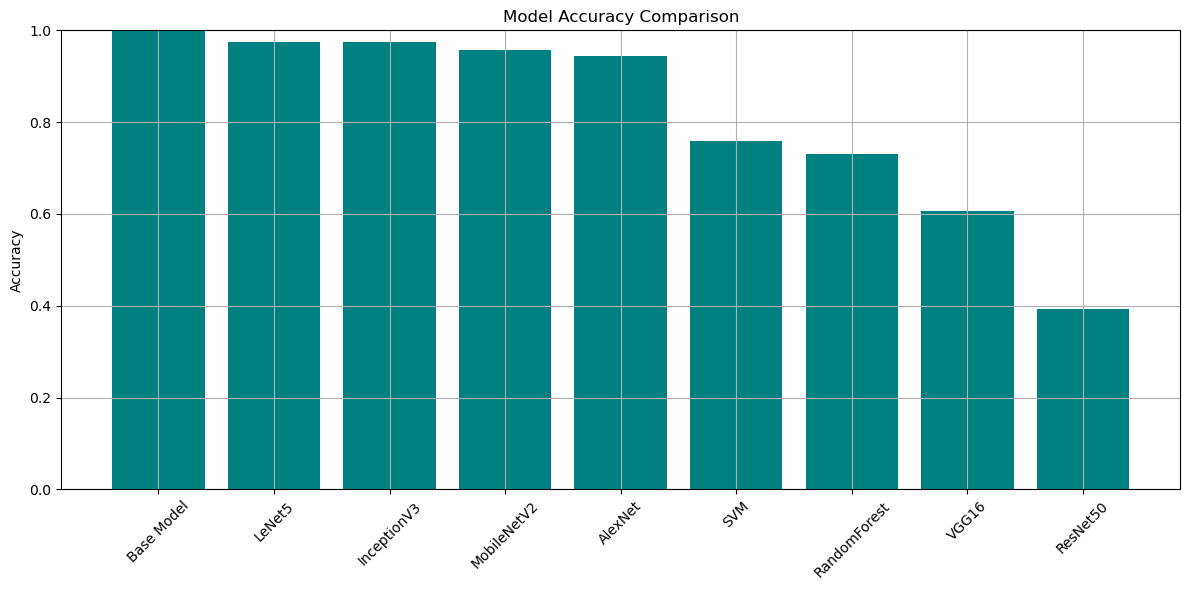

In [34]:
df = pd.DataFrame(results, columns=["Model", "Precision", "Recall", "Accuracy"])
df.sort_values(by="Accuracy", ascending=False, inplace=True)

print("\nFinal Model Comparison:\n")
print(df)

plt.figure(figsize=(12, 6))
plt.bar(df["Model"], df["Accuracy"], color='teal')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()